In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
coffee_production = pd.read_csv("../Data/coffee/total-production.csv").T

coffee_production.columns= coffee_production.iloc[0]

coffee_production.drop("total_production", inplace=True)

# Single Figure Report on Brazil's Place in Global Coffee Market

In [3]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [4]:
plt.rc("axes.spines", top=False, right=False)

### Data Prep

In [5]:
brazil_vs_others=coffee_production.assign(rest_of_world= coffee_production.drop("Brazil",axis=1).sum(axis=1)).loc[:,["Brazil","rest_of_world"]]

In [6]:
brazil_vs_others.head()

total_production,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.047,65121.147


In [7]:
brazil_vs_others["Brazil"]=brazil_vs_others["Brazil"].astype(float)
brazil_vs_others["rest_of_world"]=brazil_vs_others["rest_of_world"].astype("float")

In [8]:
brazil_vs_others.dtypes

total_production
Brazil           float64
rest_of_world    float64
dtype: object

In [9]:


brazil_vs_others.head()

total_production,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


In [10]:
coffee= coffee_production

In [11]:
coffee["Rest Of World"]=coffee_production.drop(["Brazil","Viet Nam","Colombia","Indonesia","Ethiopia",], axis=1).sum(axis=1)

In [12]:
top5=coffee.loc["2018",["Brazil","Viet Nam","Colombia","Indonesia","Ethiopia","Rest Of World"]]

In [13]:
top5

total_production
Brazil           62924.8836
Viet Nam         31174.0742
Colombia          13857.962
Indonesia         9417.5942
Ethiopia          7776.2234
Rest Of World    45786.0003
Name: 2018, dtype: object

In [14]:
bar_data=coffee.loc[:,["Brazil","Viet Nam","Colombia","Indonesia","Ethiopia","Rest Of World"]].sum()

In [15]:
bar_data=pd.DataFrame(bar_data)

In [16]:
bar_data

,0
total_production,
Brazil,1190965.7353
Viet Nam,439540.9519
Colombia,345871.4464
Indonesia,245116.7707
Ethiopia,141542.8931
Rest Of World,1225391.5436


In [17]:
from matplotlib.gridspec import GridSpec

Text(0.5, 1.0, 'Share Of Total Coffee Production 2018')

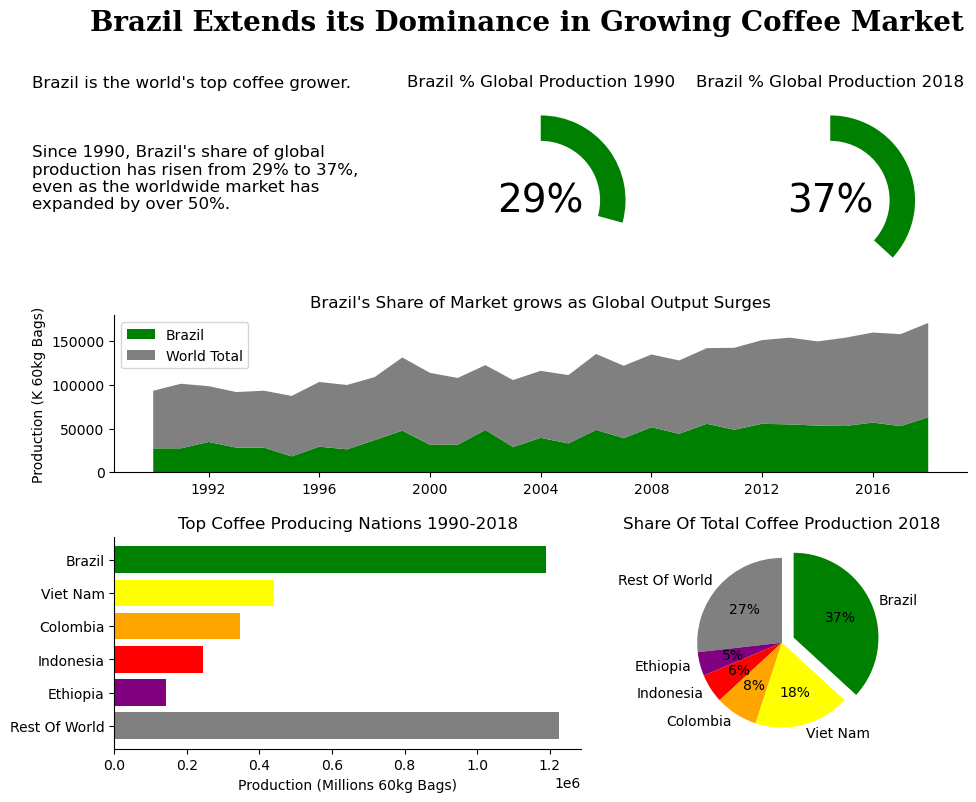

In [18]:
fig = plt.figure(figsize=(11, 8.5))
gs = GridSpec(12,9, figure=fig)

fig.suptitle("Brazil Extends its Dominance in Growing Coffee Market", 
             fontsize=20, 
             fontweight="bold",
             fontfamily='serif'
            )

fig.text(.05, .725, 
'''Brazil is the world's top coffee grower.



Since 1990, Brazil's share of global 
production has risen from 29% to 37%, 
even as the worldwide market has 
expanded by over 50%.
''', fontsize=12)


ax1=fig.add_subplot(gs[0:4,3:6])
ax1.pie(brazil_vs_others.loc["1990"][::-1], colors=["white","green"], startangle=90)
hole=plt.Circle((0,0),0.70,fc="white")
fig=plt.gcf()
fig.gca().add_artist(hole)
plt.text(
    0, 
    0, 
    f"{round((brazil_vs_others.loc['1990', 'Brazil'] / brazil_vs_others.loc['1990'].sum()*100))}%", 
    ha='center', 
    va='center', 
    fontsize=28
)
ax1.set_title("Brazil % Global Production 1990", fontsize=12)

ax2=fig.add_subplot(gs[0:4,6:])
ax2.pie(brazil_vs_others.loc["2018"][::-1], colors=["white","green"], startangle=90)
hole=plt.Circle((0,0),0.70,fc="white")
fig=plt.gcf()
fig.gca().add_artist(hole)
plt.text(
    0, 
    0, 
    f"{round((brazil_vs_others.loc['2018', 'Brazil'] / brazil_vs_others.loc['2018'].sum()*100))}%", 
    ha='center', 
    va='center', 
    fontsize=28
)
ax2.set_title("Brazil % Global Production 2018", fontsize=12)
ax3=fig.add_subplot(gs[4:7,:])
ax3.stackplot(brazil_vs_others.index.astype("datetime64[ns]"), brazil_vs_others["Brazil"], brazil_vs_others["rest_of_world"], colors=["green","grey"], labels=["Brazil","World Total"])
ax3.legend()
ax3.set_title("Brazil's Share of Market grows as Global Output Surges")
ax3.set_ylabel("Production (K 60kg Bags)")


ax4=fig.add_subplot(gs[8:,:5])
ax4.barh(y=bar_data.index[::-1],width=bar_data[0][::-1],color=["grey", "purple", "red", "orange", "yellow", "green"])
ax4.set_xlabel("Production (Millions 60kg Bags)")
ax4.set_title("Top Coffee Producing Nations 1990-2018")
    
ax5=fig.add_subplot(gs[8:,5:])
ax5.pie(top5[::-1], labels=top5.index[::-1], startangle=90, autopct="%.0f%%", colors=["green","yellow","orange","red","purple","grey"][::-1], explode=[0,0,0,0,0,0.15]);
ax5.set_title("Share Of Total Coffee Production 2018")
#plt.savefig("coffee_production.jpeg", dpi=1000)

# Subplots

In [19]:
prices_paid_to_growers = pd.read_csv("../Data/coffee/prices-paid-to-growers.csv").T.drop(9, axis=1)

prices_paid_to_growers.columns= prices_paid_to_growers.iloc[0]

prices_paid_to_growers.drop("prices_paid_to_growers", inplace=True)

prices_paid_to_growers["Other Nations"] =  prices_paid_to_growers.drop(["Colombia", "Brazil", "Ethiopia"], axis=1).mean(axis=1)

In [20]:
prices_paid_to_growers.head()

prices_paid_to_growers,Colombia,Dominican Republic,El Salvador,Guatemala,Honduras,India,Uganda,Brazil,Ethiopia,India,Togo,Uganda,Other Nations
1990,1.534724,1.458168,1.116194,1.204956,1.11147,1.473558,0.337598,1.199223,1.348565,0.978921,0.645267,0.166486,0.943624
1991,1.48179,1.382845,0.983322,1.270086,1.238947,1.358371,0.654322,0.97115,1.505322,0.897289,0.632307,0.26143,0.964325
1992,1.204656,1.027841,0.682322,0.888099,0.886057,1.191159,0.441397,0.997768,1.351128,0.877945,0.658494,0.197653,0.761219
1993,1.106477,1.172704,0.780397,0.914552,0.828746,1.278669,0.552298,1.167263,1.362442,0.975912,0.499857,0.259737,0.806986
1994,1.898327,2.478234,2.191177,1.662711,1.800576,1.73081,1.666651,2.52911,2.418234,1.246437,0.573784,0.919709,1.585565


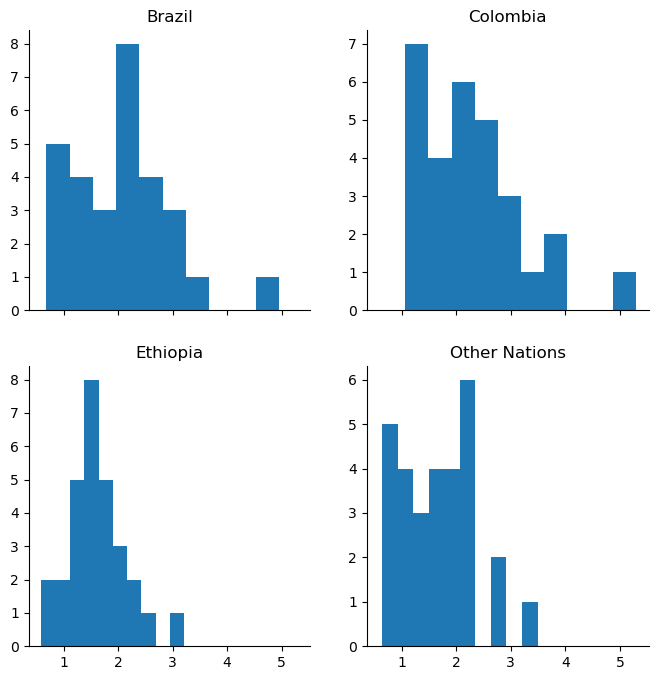

In [21]:
fig, ax = plt.subplots(2, 2, sharex='all', figsize=(8, 8))


ax[0][0].set_title("Brazil")
ax[0][0].hist(prices_paid_to_growers["Brazil"])

ax[0][1].set_title("Colombia")
ax[0][1].hist(prices_paid_to_growers["Colombia"])

ax[1][0].set_title("Ethiopia")
ax[1][0].hist(prices_paid_to_growers["Ethiopia"])

ax[1][1].set_title("Other Nations")
ax[1][1].hist(prices_paid_to_growers["Other Nations"])

plt.show()
